## Подготовка данных

In [1]:
#pip install imblearn

In [43]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve 

In [5]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [6]:
data.head(10) # выводим первые 10 строчек датафрейма data на экран.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [7]:
data.info()# выводим данные о датафрейме дата на экран
# В датафрейме 10000 строк
# Пропущенные данные есть в столбце Tenure
# Данный столбец показывает, сколько лет человек является клиентом банка.Рассмотрим данный столбец с следующем пункте

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
data[data['Tenure'].isnull() == True].head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [9]:
#Проверим данные на дубликаты
data.duplicated().sum()

0

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Вывод**
В колонке Tenure есть пропущенные значения, однако, данные необходимо исследовать, чтобы определиться, что делать со столбцом

## Исследование задачи

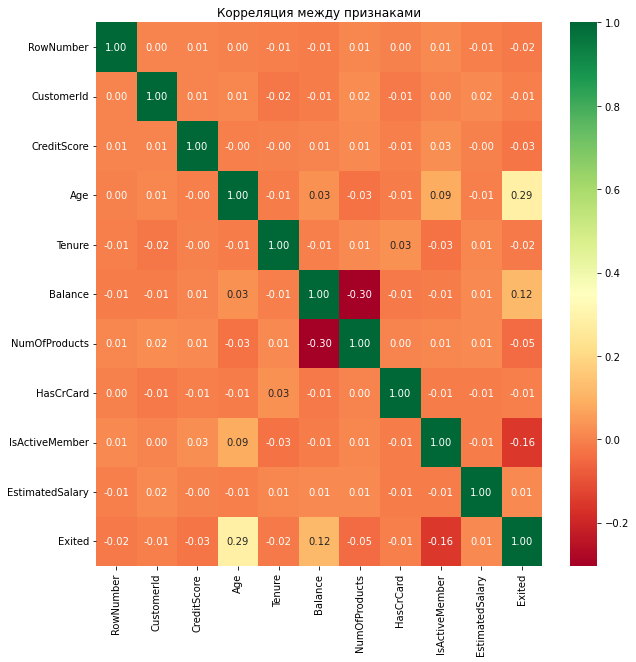

In [11]:
# Посмотрим корреляцию между признаками
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Корреляция между признаками')
plt.show();


Явной зависимости между данными нет. Есть небольшая корреляция между балансом и количеством продуктов, что логично. Чем больше продуктов у человека, тем меньше его баланс.Также есть небольшая зависимость между возрастом и уходом клиента.

Столбцы `RowNumber`, `CustomerId`, `Surname` явно не влияют на то, уйдет человек из банка или нет. Избавимся от этих столбцов.

In [12]:
data.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

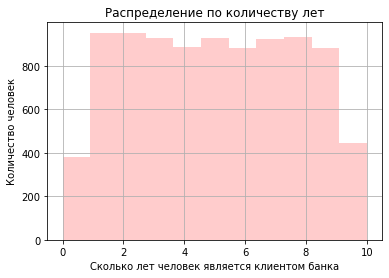

In [13]:
#Данные распределены от 0 до 10
data['Tenure'].value_counts()
# построим гистограмму по столбцу Tenure
plt.figure()
data['Tenure'].hist(bins=11, facecolor='red', alpha = 0.2)
plt.xlabel('Сколько лет человек является клиентом банка')
plt.ylabel('Количество человек')
plt.title('Распределение по количеству лет')
plt.show()

In [14]:
data.loc[data['Tenure'].isnull() == True,'Tenure'] = np.random.randint(0,10,size=data['Tenure'].isnull().sum())

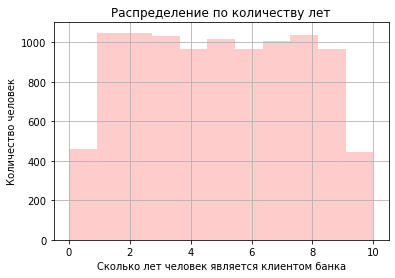

In [15]:
#Проверим еще раз гистограмму распределния
plt.figure()
data['Tenure'].hist(bins=11, facecolor='red', alpha = 0.2)
plt.xlabel('Сколько лет человек является клиентом банка')
plt.ylabel('Количество человек')
plt.title('Распределение по количеству лет')
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [17]:
data['Exited'].value_counts()/len(data)*100
# Данные не сбалансированы. Учтем в дальнейшем данный дисбаланс классов.

0    79.63
1    20.37
Name: Exited, dtype: float64

In [18]:
# Данные предобработаны, можно начинать анализ
# Целевой признак - столбец is_ultra, все остальные данные занесем в features
features = data.drop(['Exited'], axis = 1) 
target = data['Exited']


In [19]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 60% - обучающая, 20% - тестовая, 20% - валидационная
features_data, features_valid, target_data, target_valid = ( 
                                train_test_split(
                                features, target, test_size=0.2, random_state=42, stratify = target))
# Разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 60% - обучающая, 20% - тестовая, 20% - валидационная
features_train, features_test, target_train, target_test = ( 
                                train_test_split(
                                features_data, target_data, test_size=0.25, random_state=42, stratify = target_data)
)

In [20]:
features_train.shape

(6000, 10)

In [21]:
features_valid.shape

(2000, 10)

In [22]:
features_test.shape

(2000, 10)

In [23]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

**Вывод**
Исходные данные разделены на обучающую, валидационную и тестовую выборки в процентах (60%, 20%, 20%). Явной зависимости между данными не обнаружено. Колонки, которые усложняют анализ удалены. 

In [24]:
#Так как данные имеют разный масштаб, стандартизируем численные признаки
#Создадим список с числовыми столбцами
numeric = ['Age','Balance','EstimatedSalary', 'CreditScore', 'Tenure']

In [25]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

In [26]:
features_train.shape

(6000, 11)

# Модели без учета дисбаланса

In [27]:
%%time
RanForClas = RandomForestClassifier()
RanForClas_params = {'n_estimators': range (1, 30), 'max_depth': range (1,30)}
RanForClas_grid = GridSearchCV(RanForClas, RanForClas_params, n_jobs=-1, scoring='accuracy')
RanForClas_grid.fit(features_train, target_train)
print('Точность модели случайный лес', '{:.2f}'.format(RanForClas_grid.best_score_), 'с параметрами', RanForClas_grid.best_params_ )

Точность модели случайный лес 0.86 с параметрами {'max_depth': 9, 'n_estimators': 16}
CPU times: total: 9.11 s
Wall time: 1min 55s


In [28]:
%%time
DecTreeClas = DecisionTreeClassifier()
DecTreeClas_params = {'max_depth': range (1,30)}
DecTreeClas_grid = GridSearchCV(DecTreeClas, DecTreeClas_params, n_jobs=-1, scoring='accuracy')
DecTreeClas_grid.fit(features_train, target_train)
print('Точность лучшей модели дерево решений', '{:.2f}'.format(DecTreeClas_grid.best_score_), 'с параметрами', DecTreeClas_grid.best_params_ )


Точность лучшей модели дерево решений 0.86 с параметрами {'max_depth': 6}
CPU times: total: 266 ms
Wall time: 1.03 s


In [47]:
%%time
LogReg = LogisticRegression()
LogisticRegression_params = {'class_weight': [None, 'balanced'], 
     'C': [0.5, 1.0, 1.5, 2.0]}
LogisticRegression_grid = GridSearchCV(LogReg, LogisticRegression_params, n_jobs=-1, scoring='accuracy')
LogisticRegression_grid.fit(features_train, target_train)
print('Точность лучшей модели логистическая регрессия', '{:.2f}'.format(LogisticRegression_grid.best_score_), 'с параметрами', LogisticRegression_grid.best_params_ )


Точность лучшей модели логистическая регрессия 0.81 с параметрами {'C': 0.5, 'class_weight': None}
CPU times: total: 281 ms
Wall time: 5.64 s


In [29]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(features_train, target_train)
'{:.2f}'.format(dummy_clf.score(features_train, target_train))

'0.80'

Так как модели не сбалансированы, то точность у наивной модели примерно такая же как и у моделей. Нужно бороться с дисбалансом

## Борьба с дисбалансом

Уравновесим данные с помощью upsampling 

In [30]:
features_upsampled, target_upsampled = SMOTE(random_state=0).fit_resample(features_train, target_train)
features_upsampled.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6338,0.323870,1.272034,0.163692,-1.240550,1,1,0,0.003579,0,0,0
7282,-1.797116,0.034466,-0.587789,1.405725,1,1,0,-0.910637,0,0,0
458,-0.601242,-0.950235,0.015588,0.392628,3,1,0,0.613545,1,0,0
8922,-1.352677,0.714624,-0.408497,0.969711,3,0,0,-1.103559,1,0,1
7929,-0.565194,0.385481,-0.744970,0.498177,3,1,0,0.392345,1,0,0


In [31]:
target_upsampled.value_counts()/len(target_upsampled)*100

0    50.0
1    50.0
Name: Exited, dtype: float64

In [32]:
features_downsampled, target_downsampled = RandomUnderSampler().fit_resample(features_train, target_train)

In [33]:
target_downsampled.value_counts()/len(target_downsampled)*100

0    50.0
1    50.0
Name: Exited, dtype: float64

Для борьбы с дисбалансом уравновесили наши выборки двумя разными методами. Теперь проверим AUC-ROC и F1 на моделях

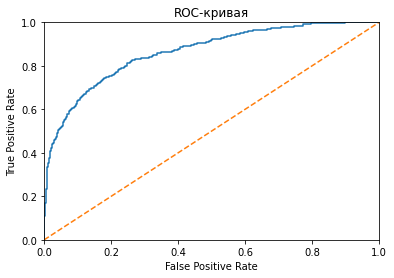

AUC-ROC модели случайный лес (классы не сбалансированы) 0.86
F1 модели случайный лес (классы не сбалансированы) 0.57 с параметрами {'class_weight': None, 'max_depth': 9, 'n_estimators': 100}
CPU times: total: 11.6 s
Wall time: 4min 48s


In [34]:
%%time
RanForClas = RandomForestClassifier()
RanForClas_params = {'n_estimators': range (10, 101, 10), 'max_depth': range (1,30), 'class_weight': [None, 'balanced']}
RanForClas_grid = GridSearchCV(RanForClas, RanForClas_params, n_jobs=-1, scoring='accuracy')
RanForClas_grid.fit(features_train, target_train)
probabilities_valid = RanForClas_grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = RanForClas_grid.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 


plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели случайный лес (классы не сбалансированы)','{:.2f}'.format(auc_roc))
print('F1 модели случайный лес (классы не сбалансированы)',\
      '{:.2f}'.format(F1), 'с параметрами', RanForClas_grid.best_params_ )

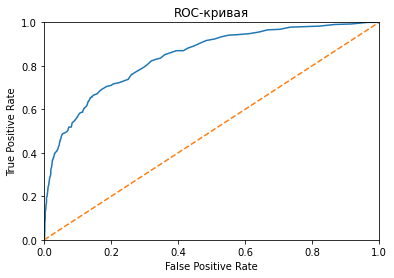

AUC-ROC модели случайный лес (сбалансированны классы, увеличением выборки) 0.84
F1 модели случайный лес (сбалансированны классы, увеличением выборки) 0.58 с параметрами {'max_depth': 26, 'n_estimators': 90}
CPU times: total: 9.31 s
Wall time: 3min 23s


In [35]:
%%time
RanForClas = RandomForestClassifier()
RanForClas_params = {'n_estimators': range (10, 101, 10), 'max_depth': range (1,30)}
RanForClas_grid_up = GridSearchCV(RanForClas, RanForClas_params, n_jobs=-1, scoring='accuracy')
RanForClas_grid_up.fit(features_upsampled, target_upsampled)
probabilities_valid = RanForClas_grid_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = RanForClas_grid_up.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели случайный лес (сбалансированны классы, увеличением выборки)','{:.2f}'.format(auc_roc))
print('F1 модели случайный лес (сбалансированны классы, увеличением выборки)',\
      '{:.2f}'.format(F1), 'с параметрами', RanForClas_grid_up.best_params_ )

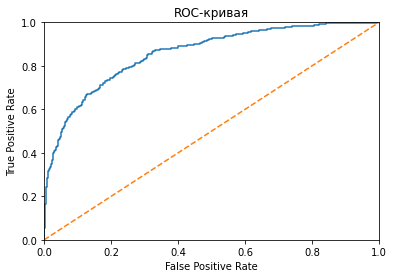

AUC-ROC модели случайный лес (сбалансированны классы, уменьшением выборки) 0.86
F1 модели случайный лес (сбалансированны классы, уменьшением выборки) 0.59 с параметрами {'max_depth': 6, 'n_estimators': 70}
CPU times: total: 3.42 s
Wall time: 1min 1s


In [36]:
%%time
RanForClas = RandomForestClassifier()
RanForClas_params = {'n_estimators': range (10, 100, 10), 'max_depth': range (1,30)}
RanForClas_grid_dw = GridSearchCV(RanForClas, RanForClas_params, n_jobs=-1, scoring='accuracy')
RanForClas_grid_dw.fit(features_downsampled, target_downsampled)
probabilities_valid = RanForClas_grid_dw.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = RanForClas_grid_dw.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели случайный лес (сбалансированны классы, уменьшением выборки)','{:.2f}'.format(auc_roc))
print('F1 модели случайный лес (сбалансированны классы, уменьшением выборки)',\
      '{:.2f}'.format(F1), 'с параметрами', RanForClas_grid_dw.best_params_ )

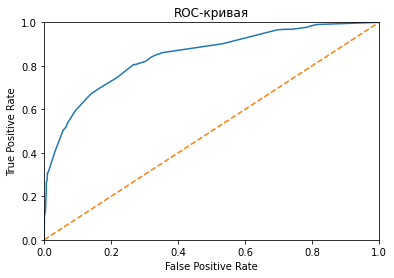

AUC-ROC модели дерево решений (классы не сбалансированы) 0.85
F1 модели дерево решений (классы не сбалансированы) 0.50 с параметрами {'max_depth': 6}
CPU times: total: 469 ms
Wall time: 1.32 s


In [37]:
%%time
DecTreeClas = DecisionTreeClassifier()
DecTreeClas_params = {'max_depth': range (1,30)}
DecTreeClas_grid = GridSearchCV(DecTreeClas, DecTreeClas_params, n_jobs=-1, scoring='accuracy')
DecTreeClas_grid.fit(features_train, target_train)
probabilities_valid = DecTreeClas_grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = DecTreeClas_grid.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели дерево решений (классы не сбалансированы)','{:.2f}'.format(auc_roc))
print('F1 модели дерево решений (классы не сбалансированы)',\
      '{:.2f}'.format(F1), 'с параметрами', DecTreeClas_grid.best_params_ )

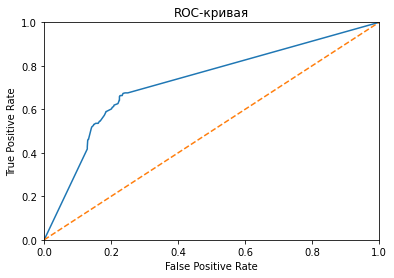

AUC-ROC модели дерево решений (сбалансированны классы, увеличением выборки) 0.73
F1 модели дерево решений (сбалансированны классы, увеличением выборки) 0.51 с параметрами {'max_depth': 14}
CPU times: total: 453 ms
Wall time: 1.96 s


In [38]:
%%time
DecTreeClas = DecisionTreeClassifier()
DecTreeClas_params = {'max_depth': range (1,30)}
DecTreeClas_grid_up = GridSearchCV(DecTreeClas, DecTreeClas_params, n_jobs=-1, scoring='accuracy')
DecTreeClas_grid_up.fit(features_upsampled, target_upsampled)
probabilities_valid = DecTreeClas_grid_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = DecTreeClas_grid_up.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели дерево решений (сбалансированны классы, увеличением выборки)','{:.2f}'.format(auc_roc))
print('F1 модели дерево решений (сбалансированны классы, увеличением выборки)',\
      '{:.2f}'.format(F1), 'с параметрами', DecTreeClas_grid_up.best_params_ )

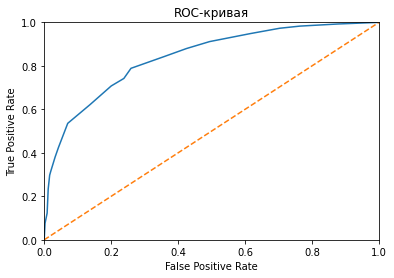

AUC-ROC модели дерево решений (сбалансированны классы, уменьшением выборки) 0.84
F1 модели дерево решений (сбалансированны классы, уменьшением выборки) 0.56 с параметрами {'max_depth': 5}
CPU times: total: 438 ms
Wall time: 876 ms


In [39]:
%%time
DecTreeClas = DecisionTreeClassifier()
DecTreeClas_params = {'max_depth': range (1,30)}
DecTreeClas_grid_dw = GridSearchCV(DecTreeClas, DecTreeClas_params, n_jobs=-1, scoring='accuracy')
DecTreeClas_grid_dw.fit(features_downsampled, target_downsampled)
probabilities_valid = DecTreeClas_grid_dw.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = DecTreeClas_grid_dw.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели дерево решений (сбалансированны классы, уменьшением выборки)','{:.2f}'.format(auc_roc))
print('F1 модели дерево решений (сбалансированны классы, уменьшением выборки)',\
      '{:.2f}'.format(F1), 'с параметрами', DecTreeClas_grid_dw.best_params_ )

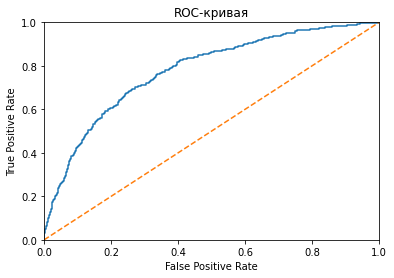

AUC-ROC модели логистическая регрессия (классы не сбалансированы) 0.78
F1 модели логистическая регрессия (классы не сбалансированы) 0.30 с параметрами {'C': 0.5, 'class_weight': None}
CPU times: total: 531 ms
Wall time: 339 ms


In [51]:
%%time
LogReg = LogisticRegression()
LogisticRegression_params = {'class_weight': [None, 'balanced'], 
     'C': [0.5, 1.0, 1.5, 2.0]}
LogisticRegression_grid = GridSearchCV(LogReg, LogisticRegression_params, n_jobs=-1, scoring='accuracy')
LogisticRegression_grid.fit(features_train, target_train)
probabilities_valid = LogisticRegression_grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = LogisticRegression_grid.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 


plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели логистическая регрессия (классы не сбалансированы)','{:.2f}'.format(auc_roc))
print('F1 модели логистическая регрессия (классы не сбалансированы)',\
      '{:.2f}'.format(F1), 'с параметрами', LogisticRegression_grid.best_params_ )

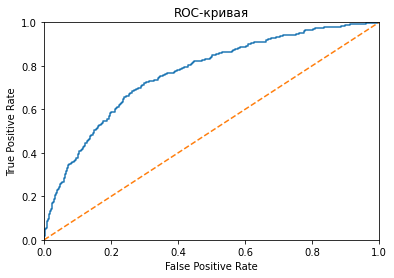

AUC-ROC модели логистическая регрессия (сбалансированны классы, увеличением выборки) 0.77
F1 модели логистическая регрессия (сбалансированны классы, увеличением выборки) 0.50 с параметрами {'C': 1.0, 'class_weight': 'balanced'}
CPU times: total: 438 ms
Wall time: 349 ms


In [56]:
%%time
LogReg = LogisticRegression()
LogisticRegression_params = {'class_weight': [None, 'balanced'], 
     'C': [0.5, 1.0, 1.5, 2.0]}
LogisticRegression_grid_up = GridSearchCV(LogReg, LogisticRegression_params, n_jobs=-1, scoring='accuracy')
LogisticRegression_grid_up.fit(features_upsampled, target_upsampled)
probabilities_valid = LogisticRegression_grid_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = LogisticRegression_grid_up.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели логистическая регрессия (сбалансированны классы, увеличением выборки)','{:.2f}'.format(auc_roc))
print('F1 модели логистическая регрессия (сбалансированны классы, увеличением выборки)',\
      '{:.2f}'.format(F1), 'с параметрами', LogisticRegression_grid_up.best_params_ )

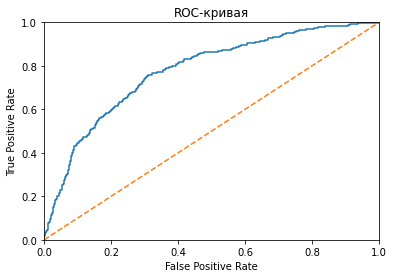

AUC-ROC модели логистическая регрессия (сбалансированны классы, уменьшением выборки) 0.78
F1 модели логистическая регрессия (сбалансированны классы, уменьшением выборки) 0.50 с параметрами {'C': 0.5, 'class_weight': None}
CPU times: total: 406 ms
Wall time: 223 ms


In [57]:
%%time
LogReg = LogisticRegression()
LogisticRegression_params = {'class_weight': [None, 'balanced'], 
     'C': [0.5, 1.0, 1.5, 2.0]}
LogisticRegression_grid_dw = GridSearchCV(LogReg, LogisticRegression_params, n_jobs=-1, scoring='accuracy')
LogisticRegression_grid_dw.fit(features_downsampled, target_downsampled)
probabilities_valid = LogisticRegression_grid_dw.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
predictions = LogisticRegression_grid_dw.predict(features_valid)
F1 = f1_score(target_valid, predictions)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC модели логистическая регрессия (сбалансированны классы, уменьшением выборки)','{:.2f}'.format(auc_roc))
print('F1 модели логистическая регрессия (сбалансированны классы, уменьшением выборки)',\
      '{:.2f}'.format(F1), 'с параметрами', LogisticRegression_grid_dw.best_params_ )

In [61]:
BestModel = RanForClas_grid_up.best_estimator_
BestModel

RandomForestClassifier(max_depth=26, n_estimators=90)

Наилучшей моделью является Модель случайного леса, в которой сбалансировали классы, увеличением выборки. AUC-ROC такой модели 0.85. F1 модели 0.59 с параметрами `max_depth`: 24, `n_estimators`: 90

## Тестирование модели

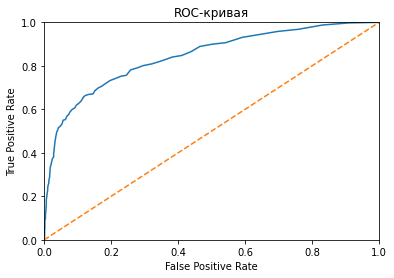

AUC-ROC наилучшей модели на тестовой выборке 0.84
F1 наилучшей модели на тестовой выборке 0.60
Accuracy наилучшей модели на тестовой выборке 0.867


In [64]:
features_train = pd.concat([features_train, features_valid])
target_train = pd.concat([target_train, target_valid])
BestModel.fit(features_train, target_train)
predictions = BestModel.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
F1 = f1_score(target_test, predictions)
probabilities_valid = BestModel.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_valid)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
print('AUC-ROC наилучшей модели на тестовой выборке', '{:.2f}'.format(auc_roc))
print('F1 наилучшей модели на тестовой выборке','{:.2f}'.format(F1))
print('Accuracy наилучшей модели на тестовой выборке','{:.3f}'.format(accuracy))

**Вывод**
F1 наилучшей модели на тестовой выборке равна 0.60
AUC-ROC наилучшей модели на тестовой выборке 0.84
Accuracy наилучшей модели на тестовой выборке 0.867

# Вывод
В ходе работы были выполнены следующие шаги:
- Данные были подготовлены и проанализированы, данные, которые усложняли анализ удалены.
- Исследован балланс классов
- Проанализованы модели, как с учетом баланса классов, так и без него.
- Выбрана наилучшая модель - Модель случайного леса, в которой сбалансировали классы, увеличением выборки. AUC-ROC такой модели 0.85. F1 модели 0.59 с параметрами `max_depth`: 24, `n_estimators`: 90. На тестовой выборке такая модель показала следующие результаты: AUC-ROC такой модели 0.85. F1 модели 0.60 с параметрами `max_depth`: 24, `n_estimators`: 90.